#### Necessary Imports/Dataset creation

In [1]:
# # Synthetic Dataset Creation
import random as rand
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_predict, LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

END = "\n------------------------------------------\n"


-------------------------------------------------------------
#### Importing the datasets

In [2]:
synthetic_df = pd.read_csv('Synthetic.csv')
financial_df = pd.read_csv('Financials.csv')

-------------------------------------------------------------
## Synthetic Dataframe ("Synthetic.csv")
Tasks to do:
* statistical descriptions, 
* histogram, 
* box plot, 
* scatter plots, 
* data distribution, 
* identifying missing values, 
* data imputation, 
* Dealing with outliers

-------------------------------------------------------------
#### Statistical Descriptions - Overall description, presence of NULL values

In [3]:
print(synthetic_df.describe(), end=END)
print(synthetic_df.info(), end=END)
print(synthetic_df.isnull().sum(), end=END)


       Unnamed: 0            A           B           C
count   700.00000   700.000000  700.000000  700.000000
mean    349.50000   600.215714  352.568571  450.877143
std     202.21688   337.494035  205.555717  260.424341
min       0.00000     5.000000    0.000000    0.000000
25%     174.75000   309.500000  173.000000  228.750000
50%     349.50000   605.500000  351.500000  446.000000
75%     524.25000   886.000000  531.000000  682.000000
max     699.00000  1199.000000  700.000000  900.000000
------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  700 non-null    int64
 1   A           700 non-null    int64
 2   B           700 non-null    int64
 3   C           700 non-null    int64
dtypes: int64(4)
memory usage: 22.0 KB
None
------------------------------------------
Unnamed: 0    0
A             0
B    

-------------------------------------------------------------
#### Histogram

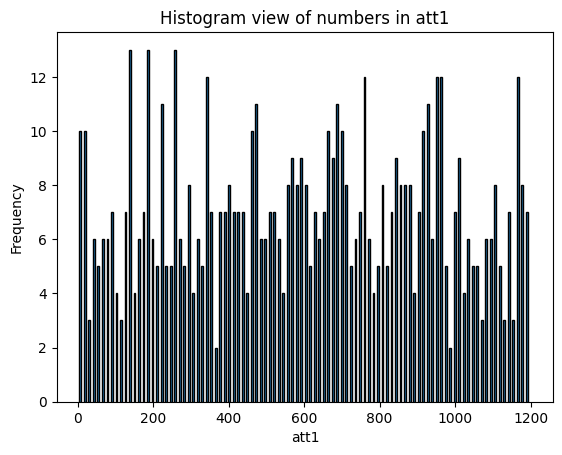

In [4]:
x, y, _ = plt.hist(synthetic_df['A'], bins=100, width=5, edgecolor='k')
plt.title("Histogram view of numbers in att1")
plt.xlabel('att1')
plt.ylabel('Frequency')
plt.show()


-------------------------------------------------------------
#### Box Plot

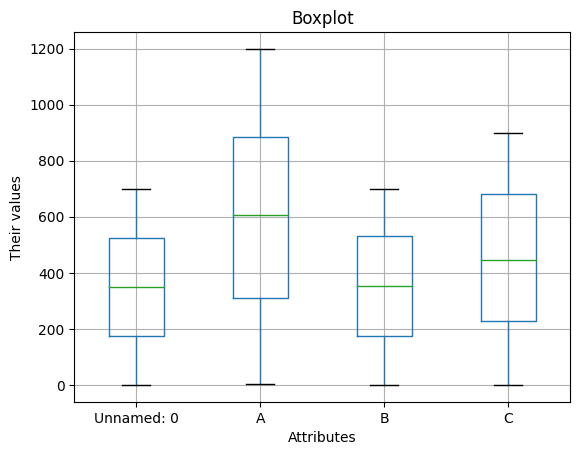

In [5]:
synthetic_df.boxplot()
plt.title('Boxplot')
plt.xlabel('Attributes')
plt.ylabel('Their values')
plt.show()

-------------------------------------------------------------
#### Scatter plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


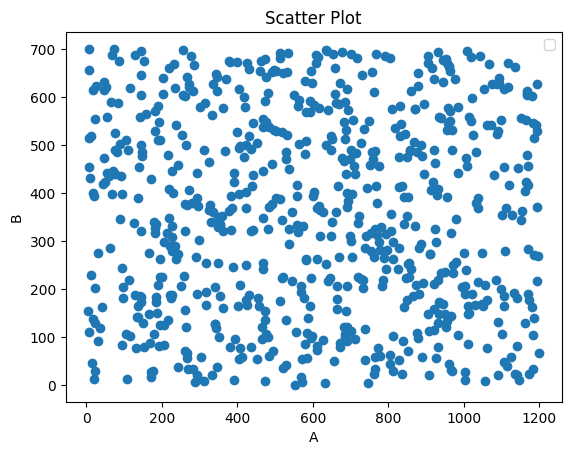

In [6]:
plt.scatter(synthetic_df['A'], synthetic_df['B'])
plt.xlabel('A')
plt.ylabel('B')
plt.title('Scatter Plot')
plt.legend()
plt.show()

-------------------------------------------------------------
#### Data Distribution

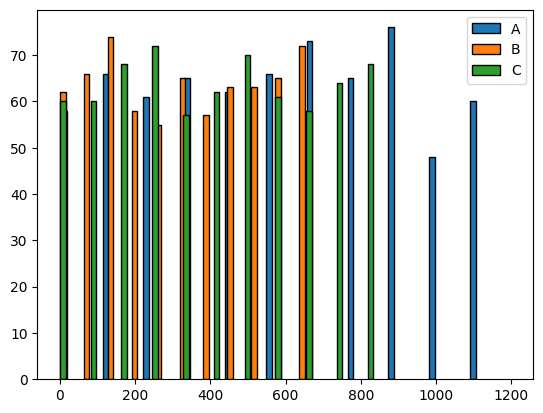

In [7]:
plt.hist(synthetic_df['A'], bins='auto', label='A', width=15, edgecolor='k')
plt.hist(synthetic_df['B'], bins='auto', label='B', width=15, edgecolor='k')
plt.hist(synthetic_df['C'], bins='auto', label='C', width=15, edgecolor='k')
plt.legend()
plt.show()

-------------------------------------------------------------
#### Missing value check

In [8]:
print(f"Missing values: {synthetic_df.isnull().sum()}")

Missing values: Unnamed: 0    0
A             0
B             0
C             0
dtype: int64


-------------------------------------------------------------
#### Since there is no null value, no scope for imputation

-------------------------------------------------------------
#### Moving on to outliers:

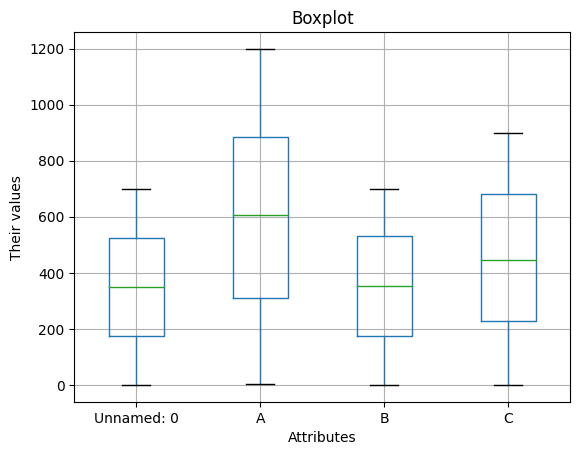

In [9]:
def remove_outliers(df):
    for col in df.columns:
        if df[col].dtype != 'object':
            lq = df[col].quantile(0.25)
            uq = df[col].quantile(0.75)
            iqr = uq - lq
            lb = lq - 1.5 * iqr
            ub = uq + 1.5 * iqr
            df = df[(df[col] >= lb) & (df[col] <= ub)]
    return df

synthetic_df.describe()
synthetic_df = remove_outliers(synthetic_df)

synthetic_df.boxplot()
plt.title('Boxplot')
plt.xlabel('Attributes')
plt.ylabel('Their values')
plt.show()

-------------------------------------------------------------
#### Applying sampling and regression

MSE (Hold-out): 117039.509069814
MSE (K-fold): 114645.78319467338
MSE (LOOCV): 114366.82983276431


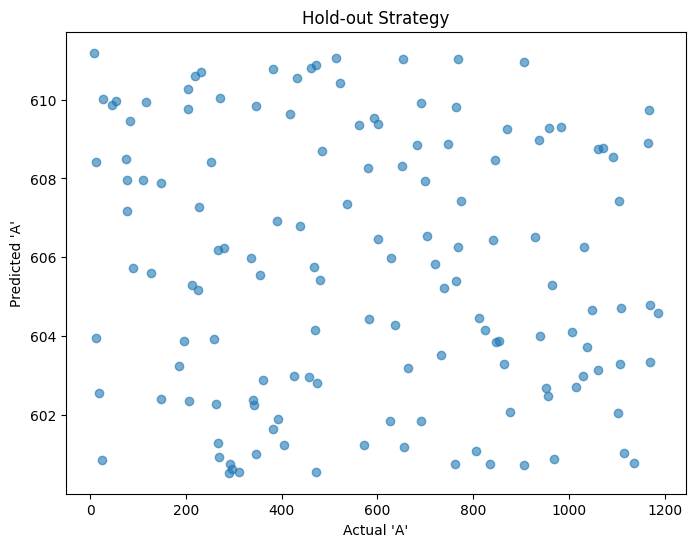

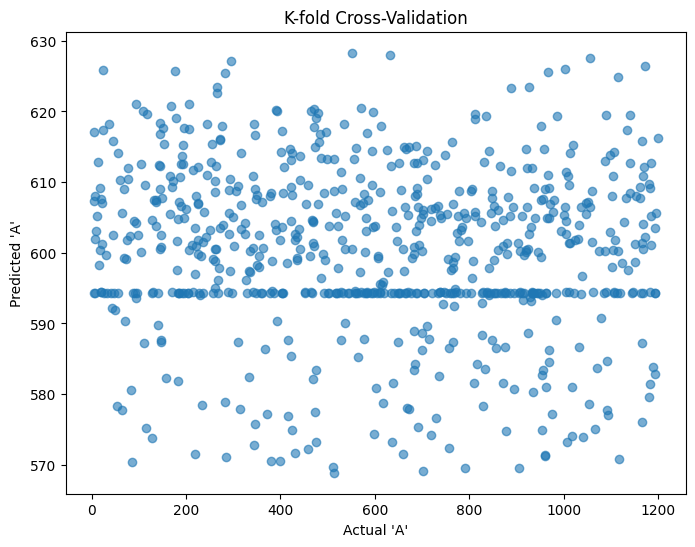

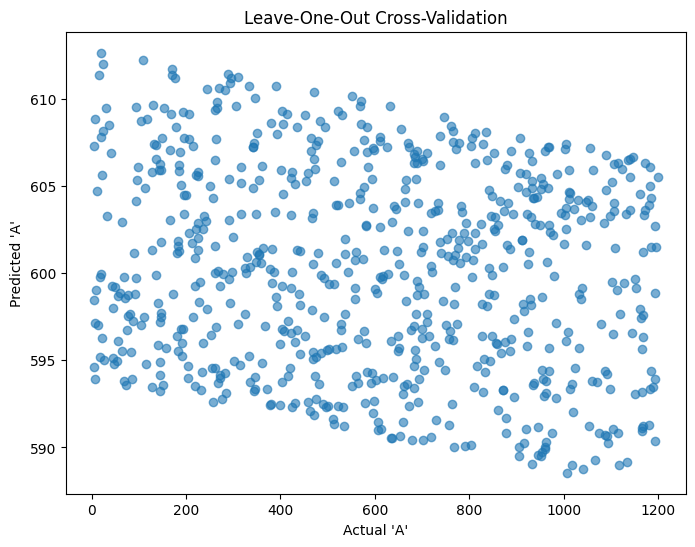

In [10]:
x_train, x_test, y_train, y_test = train_test_split(
    synthetic_df[['B']], synthetic_df['A'], test_size=0.2, random_state=42
)
reg_model = LinearRegression()
reg_model.fit(x_train, y_train)
y_pred = reg_model.predict(x_test)

hold_out_error = mean_squared_error(y_test, y_pred)
print("MSE (Hold-out):", hold_out_error)

k = 5
y_pred_k_fold = cross_val_predict(reg_model, synthetic_df[['B']], synthetic_df['A'], cv=k)
k_fold_error = mean_squared_error(synthetic_df['A'], y_pred_k_fold)
print("MSE (K-fold):", k_fold_error)

loo = LeaveOneOut()
y_pred_loocv = cross_val_predict(reg_model, synthetic_df[['B']], synthetic_df['A'], cv=loo)
mse_loocv = mean_squared_error(synthetic_df['A'], y_pred_loocv)
print("MSE (LOOCV):", mse_loocv)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual 'A'")
plt.ylabel("Predicted 'A'")
plt.title("Hold-out Strategy")
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(synthetic_df['A'], y_pred_k_fold, alpha=0.6)
plt.xlabel("Actual 'A'")
plt.ylabel("Predicted 'A'")
plt.title("K-fold Cross-Validation")
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(synthetic_df['A'], y_pred_loocv, alpha=0.6)
plt.xlabel("Actual 'A'")
plt.ylabel("Predicted 'A'")
plt.title("Leave-One-Out Cross-Validation")
plt.show()


-------------------------------------------------------------
## Kaggle Dataframe ("Financials.csv")
Tasks to do:
* statistical descriptions, 
* histogram, 
* box plot, 
* scatter plots, 
* data distribution, 
* identifying missing values, 
* data imputation, 
* Dealing with outliers

-------------------------------------------------------------
#### Data Descriptions

In [11]:
print(financial_df.describe(), end=END)
print(financial_df.info(), end=END)
print(financial_df.isnull().sum(), end=END)

       Month Number         Year
count    700.000000   700.000000
mean       7.900000  2013.750000
std        3.377321     0.433322
min        1.000000  2013.000000
25%        5.750000  2013.750000
50%        9.000000  2014.000000
75%       10.250000  2014.000000
max       12.000000  2014.000000
------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Segment              700 non-null    object
 1   Country              700 non-null    object
 2   Product              700 non-null    object
 3   Discount Band        700 non-null    object
 4   Units Sold           700 non-null    object
 5   Manufacturing Price  700 non-null    object
 6   Sale Price           700 non-null    object
 7   Gross Sales          700 non-null    object
 8   Discounts            700 non-null    object
 9   Sales      

-------------------------------------------------------------
#### Process the columns

In [12]:
columns = ['Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Sales', 'COGS', 'Profit']

# Remove $ signs
for column in financial_df:
    if financial_df[column].dtypes == "object" and column in columns:
        for index, value in enumerate(financial_df[column]):
            try:
                if value != ' - ':
                    financial_df.at[index, column] = float(value.replace('$', '').replace(',', ''))
                    print(type(financial_df.at[index, column]))
            except ValueError:
                pass


<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class '

-------------------------------------------------------------
#### Histogram

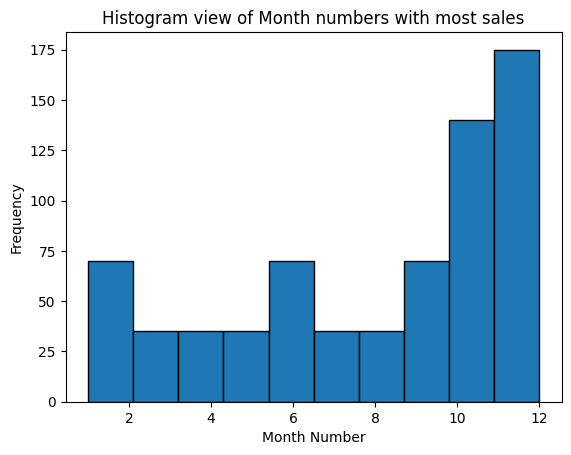

In [13]:
x, y, _ = plt.hist(financial_df['Month Number'], edgecolor='k')
plt.title("Histogram view of Month numbers with most sales")
plt.xlabel('Month Number')
plt.ylabel('Frequency')
plt.show()

-------------------------------------------------------------
#### Box Plots

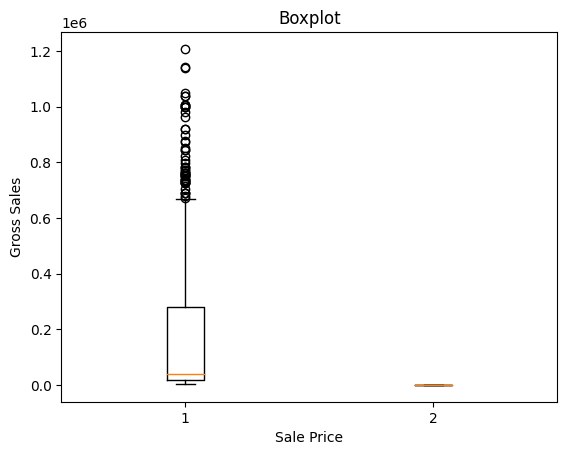

In [14]:
# sns.boxplot(data=financial_df, y='Gross Sales', x='Sale Price')
plt.boxplot(financial_df[['Gross Sales', 'Sale Price']])
plt.title('Boxplot')
plt.xlabel('Sale Price')
plt.ylabel('Gross Sales')
plt.show()


-------------------------------------------------------------
#### Scatter plots

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


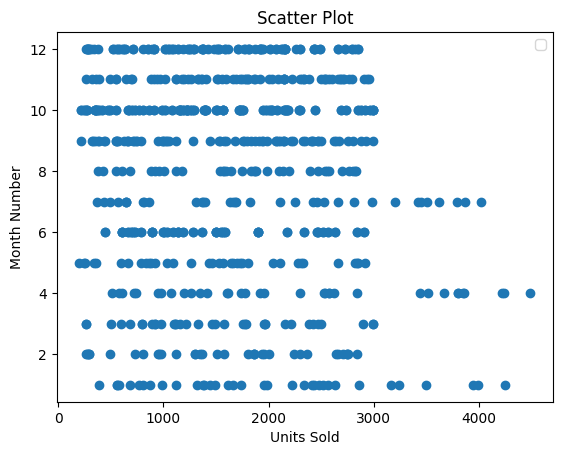

In [15]:
plt.scatter(financial_df['Units Sold'], financial_df['Month Number'])
plt.xlabel('Units Sold')
plt.ylabel('Month Number')
plt.title('Scatter Plot')
plt.legend()
plt.show()

-------------------------------------------------------------
#### Data Distribution

<Figure size 640x480 with 0 Axes>

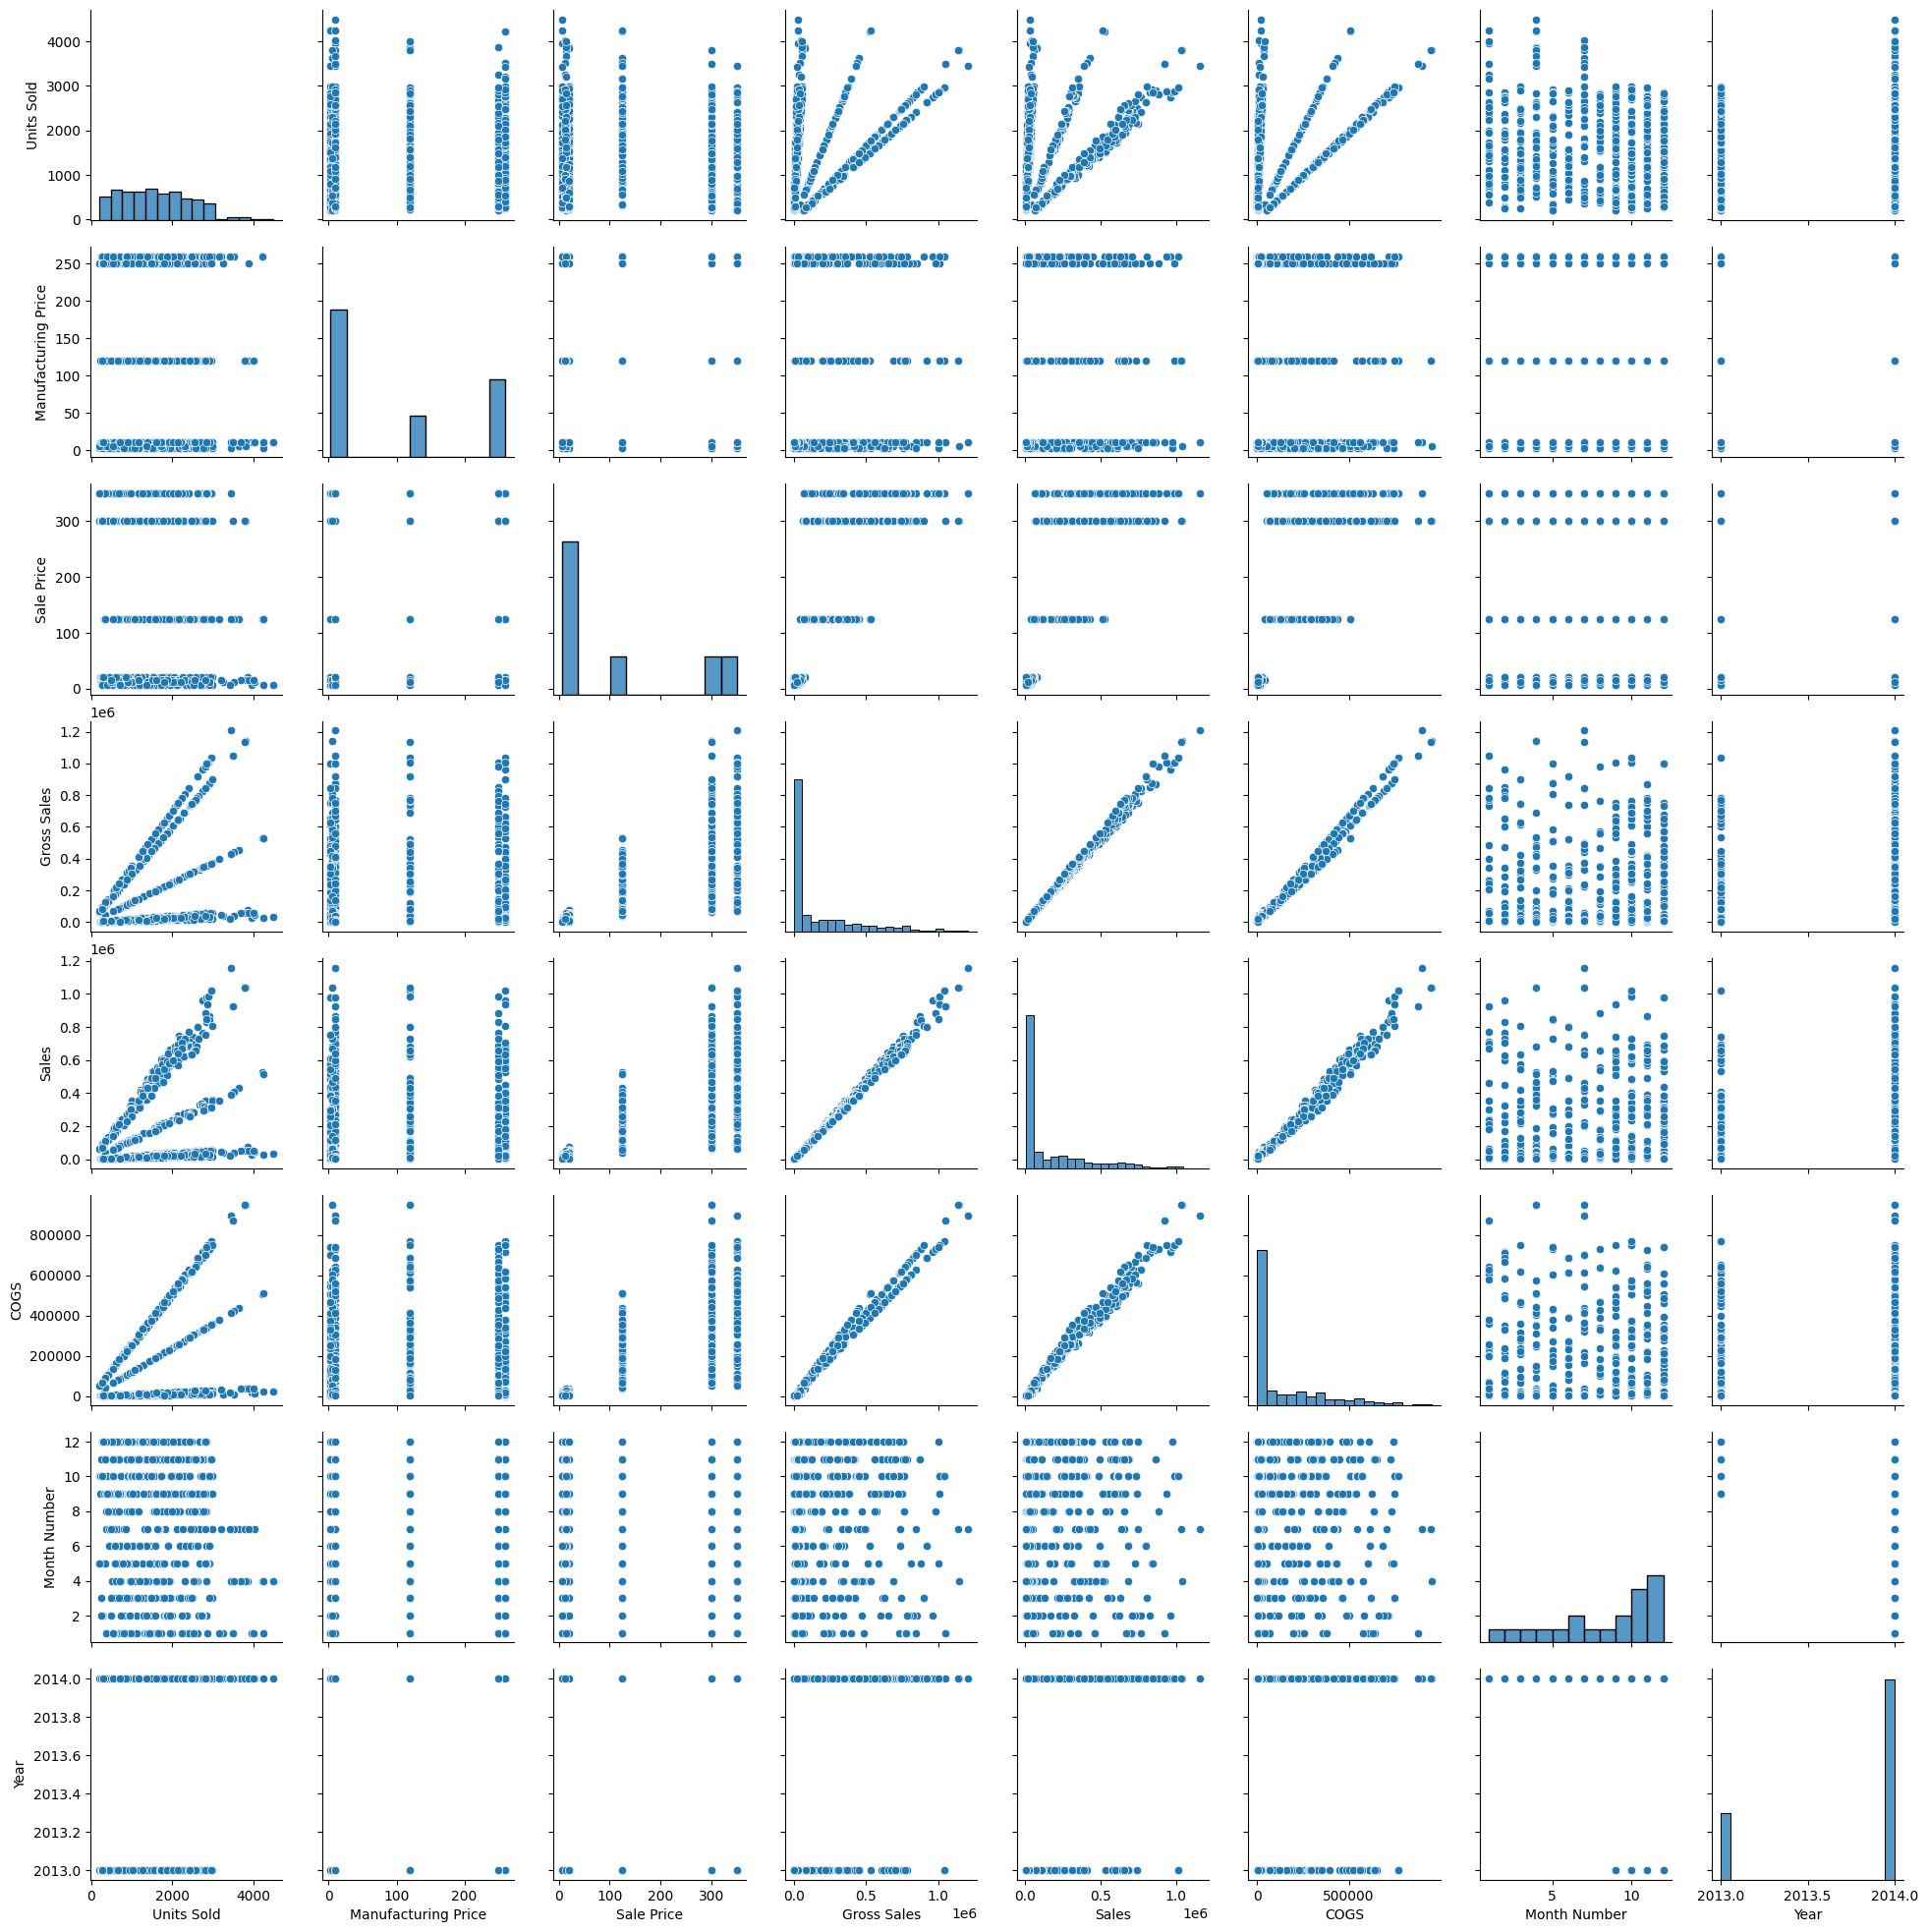

In [16]:
plt.figure()
sns.pairplot(financial_df)
plt.show()

-------------------------------------------------------------
#### Identifying missing values

In [17]:
financial_df = financial_df.replace(' $-   ', None)
print(financial_df.isnull().sum())

Segment                 0
Country                 0
Product                 0
Discount Band           0
Units Sold              0
Manufacturing Price     0
Sale Price              0
Gross Sales             0
Discounts              53
Sales                   0
COGS                    0
Profit                  5
Date                    0
Month Number            0
Month Name              0
Year                    0
dtype: int64


-------------------------------------------------------------
#### Data imputation

In [18]:
for col in ['Discounts', 'Profit']:
    financial_df[col].fillna(financial_df[col].mode(), inplace=True)

C:\Users\hifia\AppData\Local\Temp\ipykernel_26700\885209867.py:2: UserWarning: Unable to sort modes: '<' not supported between instances of 'float' and 'str'
  financial_df[col].fillna(financial_df[col].mode(), inplace=True)


-------------------------------------------------------------
#### Dealing with outliers

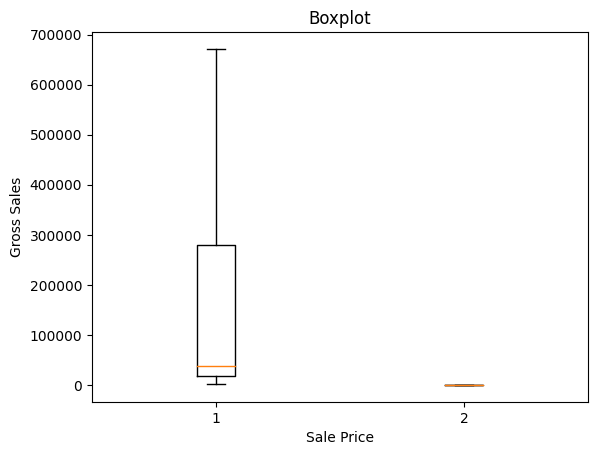

In [19]:
def cap(column):
    q1 = np.percentile(column, 25)
    q3 = np.percentile(column, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Cap the outliers
    column =  np.clip(column, lower_bound, upper_bound)
    return column

financial_df_fixed = [cap(data) for data in [financial_df['Gross Sales'], financial_df['Sale Price']]]
plt.boxplot(financial_df_fixed)
plt.title('Boxplot')
plt.xlabel('Sale Price')
plt.ylabel('Gross Sales')
plt.show()

-------------------------------------------------------------
#### Feature scaling before regression

In [28]:
# Define the new minimum and maximum values for scaling (0 and 12)
new_min = 0
new_max = 12

# Calculate the current minimum and maximum values for 'Units Sold' and 'Sale Price'
min_u = financial_df['Units Sold'].min()
max_u = financial_df['Units Sold'].max()

min_sp = financial_df['Month Number'].min()
max_sp = financial_df['Month Number'].max()

# Perform Min-Max scaling for 'Units Sold'
financial_df['Units Sold Scaled'] = ((financial_df['Units Sold'] - min_u) * (new_max - new_min) / (max_u - min_u)) + new_min

# Perform Min-Max scaling for 'Sale Price'
financial_df['Month Number Scaled'] = ((financial_df['Month Number'] - min_sp) * (new_max - new_min) / (max_sp - min_sp)) + new_min


-------------------------------------------------------------
#### Applying sampling and regression

MSE (Hold-out): 11.439847939752394
MSE (LOOCV): 11.332690015309014


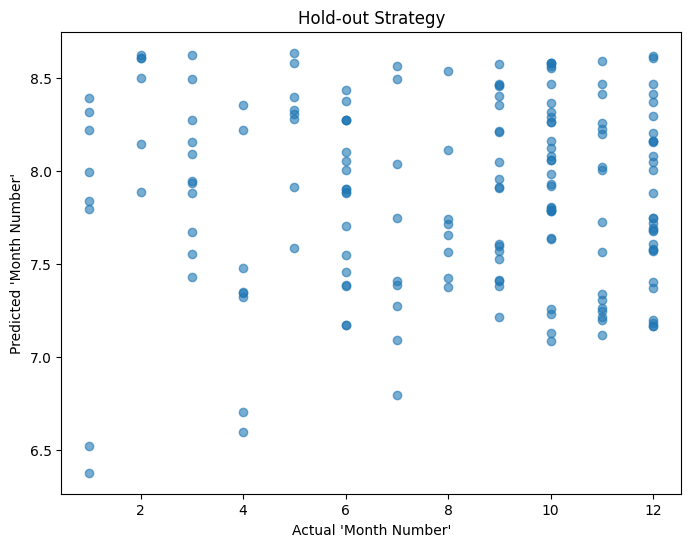

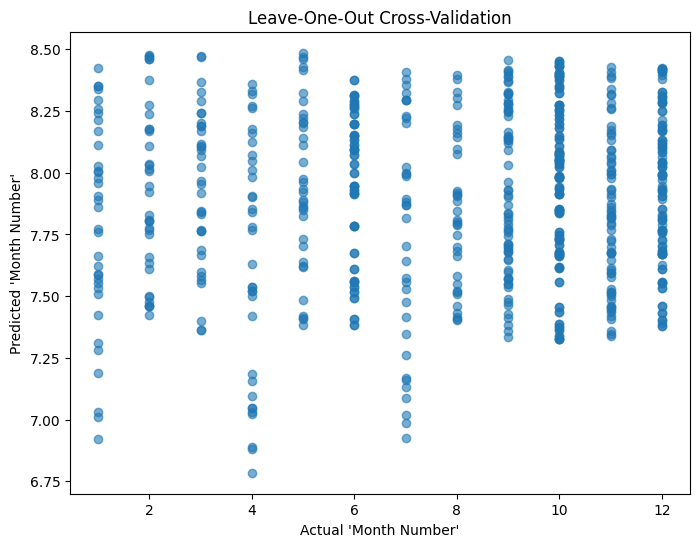

In [29]:
# Step 1: Splitting the data into train and test sets using hold-out strategy
x_train, x_test, y_train, y_test = train_test_split(
    financial_df[['Units Sold']], financial_df['Month Number'], test_size=0.25, random_state=12)

# Create and fit the Linear Regression model
reg_model = LinearRegression()
reg_model.fit(x_train, y_train)

# Predict on the test set
y_pred = reg_model.predict(x_test)

# Calculate Mean Squared Error (MSE) for hold-out strategy
hold_out_error = mean_squared_error(y_test, y_pred)
print("MSE (Hold-out):", hold_out_error)

# Perform Leave-One-Out Cross-Validation (LOOCV)
loo = LeaveOneOut()
y_pred_loocv = cross_val_predict(reg_model, financial_df[['Units Sold']], financial_df['Month Number'], cv=loo)
mse_loocv = mean_squared_error(financial_df['Month Number'], y_pred_loocv)
print("MSE (LOOCV):", mse_loocv)


# Scatter plot for Hold-out strategy
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual 'Month Number'")
plt.ylabel("Predicted 'Month Number'")
plt.title("Hold-out Strategy")
plt.show()

# Scatter plot for LOOCV
plt.figure(figsize=(8, 6))
plt.scatter(financial_df['Month Number'], y_pred_loocv, alpha=0.6)
plt.xlabel("Actual 'Month Number'")
plt.ylabel("Predicted 'Month Number'")
plt.title("Leave-One-Out Cross-Validation")
plt.show()

